
# Pass plot using arrrows

This example shows how to plot all passes from a team in a match as arrows.


In [1]:
from mplsoccer import Pitch, FontManager, Sbopen
from matplotlib import rcParams
import matplotlib.pyplot as plt

rcParams['text.color'] = '#c7d5cc'  # set the default text color

# get event dataframe for game 7478
parser = Sbopen()
df, related, freeze, tactics = parser.event(7478)

Boolean mask for filtering the dataset by team



In [2]:
team1, team2 = df.team_name.unique()
mask_team1 = (df.type_name == 'Pass') & (df.team_name == team1)

Filter dataset to only include one teams passes and get boolean mask for the completed passes



In [3]:
df_pass = df.loc[mask_team1, ['x', 'y', 'end_x', 'end_y', 'outcome_name']]
mask_complete = df_pass.outcome_name.isnull()

View the pass dataframe.



In [4]:
df_pass.head()

,x,y,end_x,end_y,outcome_name
20,11.0,80.0,29.0,68.0,NaN
22,29.0,67.0,58.0,80.0,Out
28,56.0,68.0,75.0,77.0,NaN
37,95.0,80.0,110.0,56.0,NaN
40,109.0,56.0,106.0,54.0,Incomplete


Plotting



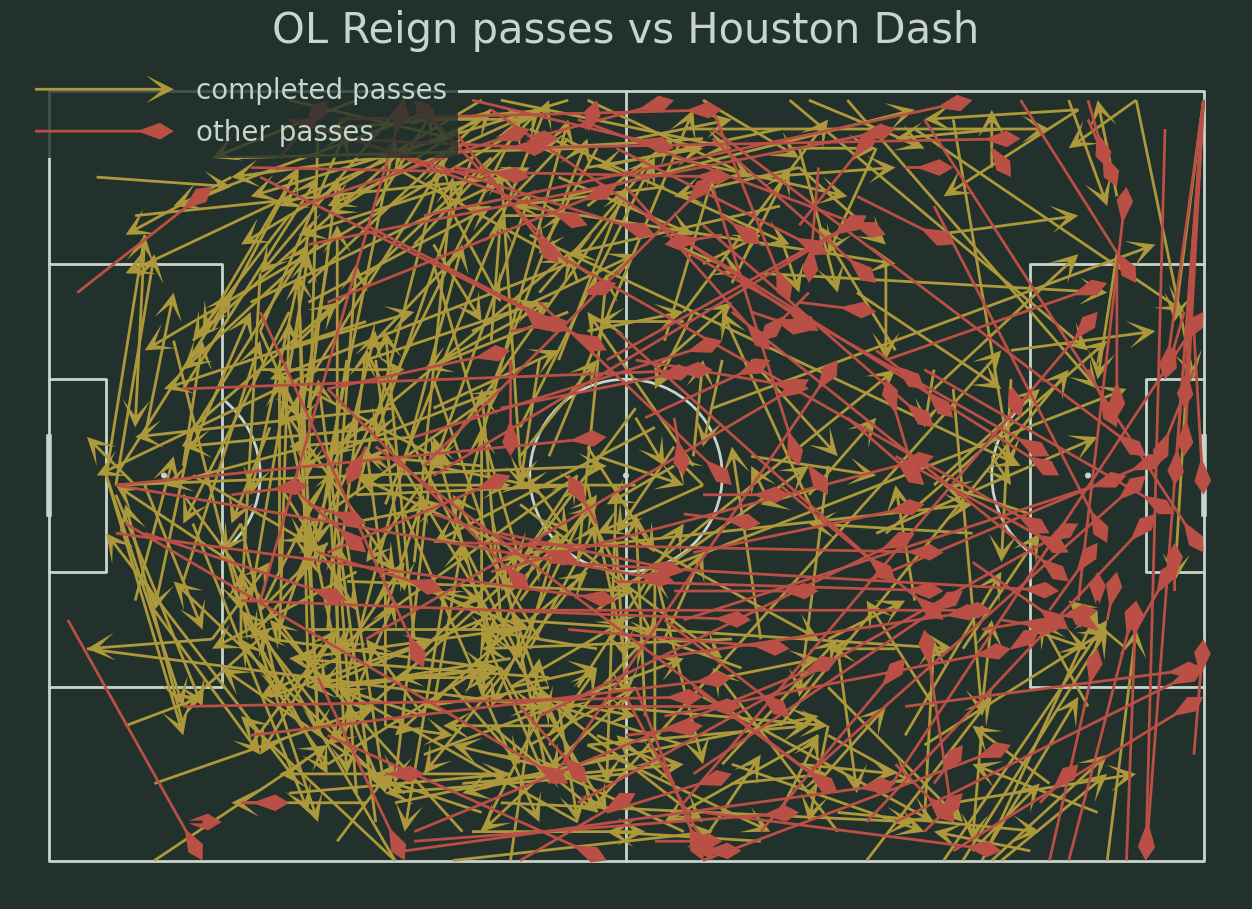

In [5]:
# Set up the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')

# Plot the completed passes
pitch.arrows(df_pass[mask_complete].x, df_pass[mask_complete].y,
             df_pass[mask_complete].end_x, df_pass[mask_complete].end_y, width=2,
             headwidth=10, headlength=10, color='#ad993c', ax=ax, label='completed passes')

# Plot the other passes
pitch.arrows(df_pass[~mask_complete].x, df_pass[~mask_complete].y,
             df_pass[~mask_complete].end_x, df_pass[~mask_complete].end_y, width=2,
             headwidth=6, headlength=5, headaxislength=12,
             color='#ba4f45', ax=ax, label='other passes')

# Set up the legend
ax.legend(facecolor='#22312b', handlelength=5, edgecolor='None', fontsize=20, loc='upper left')

# Set the title
ax_title = ax.set_title(f'{team1} passes vs {team2}', fontsize=30)

Plotting with grid.
We will use mplsoccer's grid function to plot a pitch with a title and endnote axes.



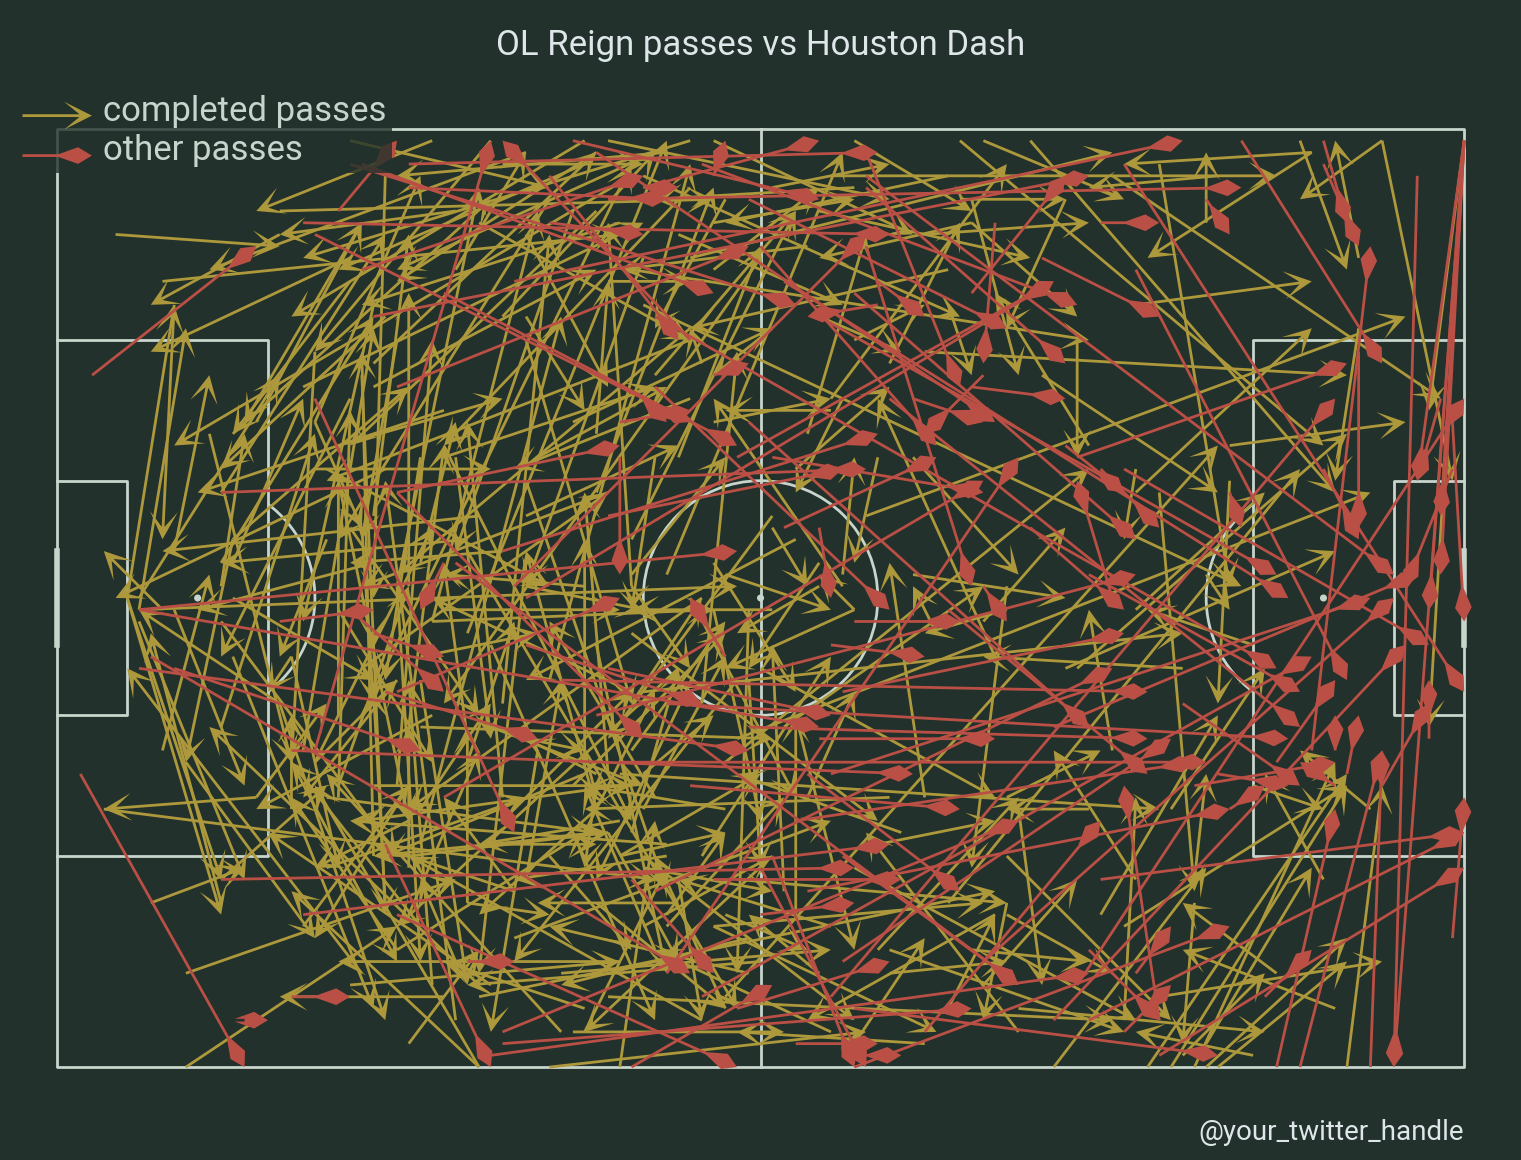

In [6]:
fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0, figheight=12,
                      title_height=0.06, title_space=0, grid_height=0.86,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False)
fig.set_facecolor('#22312b')

# Plot the completed passes
pitch.arrows(df_pass[mask_complete].x, df_pass[mask_complete].y,
             df_pass[mask_complete].end_x, df_pass[mask_complete].end_y, width=2, headwidth=10,
             headlength=10, color='#ad993c', ax=axs['pitch'], label='completed passes')

# Plot the other passes
pitch.arrows(df_pass[~mask_complete].x, df_pass[~mask_complete].y,
             df_pass[~mask_complete].end_x, df_pass[~mask_complete].end_y, width=2,
             headwidth=6, headlength=5, headaxislength=12,
             color='#ba4f45', ax=axs['pitch'], label='other passes')

# fontmanager for Google font (robotto)
robotto_regular = FontManager()

# Set up the legend
legend = axs['pitch'].legend(facecolor='#22312b', handlelength=5, edgecolor='None',
                             prop=robotto_regular.prop, loc='upper left')
for text in legend.get_texts():
    text.set_fontsize(25)

# endnote and title
axs['endnote'].text(1, 0.5, '@your_twitter_handle', va='center', ha='right', fontsize=20,
                    fontproperties=robotto_regular.prop, color='#dee6ea')
axs['title'].text(0.5, 0.5, f'{team1} passes vs {team2}', color='#dee6ea',
                  va='center', ha='center',
                  fontproperties=robotto_regular.prop, fontsize=25)

plt.show()  # If you are using a Jupyter notebook you do not need this line